In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data wrangling and the data in HW6


For this week's homework we have two sources of data that we are going to need to use:

1. The [mapped reads](http://mcb111.org/w06/w06-homework_backcross.reads)
2. The [sequence data](http://mcb111.org/w06/w06-homework_backcross_genome.afa)

Let's get started with the mapped reads. If we get a file that we don't know how it is formatted, the best way to attempt to handle it is to understand its structure. The homework tells us that *"This file has 10,000 rows, each with four columns. Each column represents the number of As, Cs, Gs, and Ts (in that order) that appeared in all the reads that mapped to that position."*

However, it is always good to have a visual sense of what is going on. Let's look at the mapped reads first:

In [ ]:
x = np.loadtxt('http://mcb111.org/w06/w06-homework_backcross.reads')

ValueError: ignored

The error above is telling us that there is a wrong number of columns at line 10000? what does this mean? Let's take a look at the data by clicking the [link](http://mcb111.org/w06/w06-homework_backcross.reads) scroll all the way to the bottom and see that there is a `\\` character which is not allowing us to use the loadtxt function directly. However, we can see that the data is 4 different columns, each of which corresponds to A's, C's, G's, and T's according to the homework. 

### How do we get around this?


Let's look at the documentation for the `numpy.loadtxt()` function

In [ ]:
np.loadtxt?

There are two arguments that come to mind to handle this, the first is: 

```
max_rows : int, optional
    Read `max_rows` lines of content. The default is to read all the lines.
```

A way to work around this is to set the max number of rows read below 10000, since by visual inspection we know the problem is there. by specifying 9999 we'd skip the last row which is not informative anyways.

In [97]:
data = np.loadtxt('http://mcb111.org/w06/w06-homework_backcross.reads',max_rows=9999)
data.shape

(9999, 4)

In [100]:
data[2,:]

6.0

By calling `data.shape` we can see that we ended up with an array of 9999 elements with 4 elements each. corresponding to A's, C's, G's, and T's. If for whatever reason we wanted all the bases to be on the same array so that we could call them by position we could make use of [numpy slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html).

If we have an array of arrays we can get the first position of every sub array in the array by calling the following:

```
array[:,0]
```

Similarly for the second position we'd call

```
array[:,1]
```

It should be obvious how to extend this to any desired position `i` in your sub-array:

```
array[:,i]
```

In [ ]:
data[50][2]==data[50,2]

True

In [ ]:
mapped_A = data[:,0]
mapped_C = data[:,1]
mapped_G = data[:,2]
mapped_T = data[:,3]

Let's continue by looking at the sequence data, the homework tells us that this data is in a FASTA format. if you're not familiar with the format please look it up on wikipedia, and just understand what it is, click on the homework [link](http://mcb111.org/w06/w06-homework_backcross_genome.afa) to see an example and let's figure out how to load this into our homework, let's again try with the good old `numpy.loadtxt()` function:

In [101]:
data = np.loadtxt('http://mcb111.org/w06/w06-homework_backcross_genome.afa',dtype=str)
data

array(['>A',
       'GACAATGCACGACAGAGGAAGCAGAACAGATATTTAGATTGCCTCTCATTTTCTCTCCCATATTATAGGGAGAAATATGATCGCGTATGCGAGAGTAGTGCCAACATATTGTGCTCTTTGATTTTTTGGCAACCCAAAATGGTGGCGGATGAACGAGATGATAATATATTCAAGTTGCCGCTAATCAGAAATAAATTCATTGCAACGTTAAATACAGCACAATATATGATCGCGTATGCGAGAGTAGTGCCAACATATTGTGCTAATGAGTGCCTCTCGTTCTCTGTCTTATATTACCGCAAACCCAAAAAGACAATACACGACAGAGAGAGAGAGCAGCGGAGATATTTAGATTGCCTATTAAATATGATCGCGTATGCGAGAGTAGTGCCAACATATTGTGCTCTCTATATAATGACTGCCTCTCATTCTGTCTTATTTTACCGCAAACCCAAATCGACAATGCACGACAGAGGAAGCAGAACAGATATTTAGATTGCCTCTCATTTTCTCTCCCATATTATAGGGAGAAATATGATCGCGTATGCGAGAGTAGTGCCAACATATTGTGCTCTTTGATTTTTTGGCAACCCAAAATGGTGGCGGATGAACGAGATGATAATATATTCAAGTTGCCGCTAATCAGAAATAAATTCATTGCAACGTTAAATACAGCACAATATATGATCGCGTATGCGAGAGTAGTGCCAACATATTGTGCTAATGAGTGCCTCTCGTTCTCTGTCTTATATTACCGCAAACCCAAAAAGACAATACACGACAGAGAGAGAGAGCAGCGGAGATATTTAGATTGCCTATTAAATATGATCGCGTATGCGAGAGTAGTGCCAACATATTGTGCTCTCTATATAATGACTGCCTCTCATTCTGTCTTATTTTACCGCAAACCCAAATCGACAATGCACGACAGAGGAAGCAGAACAGATATTTAGATTGCCTCTCATTTTCTCTCCCATAT

In [104]:
for i in range(9999):
    
    Gi = data[1][i]+data[3][i]
    func_PXgivenG(Gi,Xi)

'TT'

So we have the header, in the first position. The sequence of that in the second position. In the next two positions are the header and sequence for the next sequence data.

We know we can ignore the `>` character as all it does is depict the start of a line that contains a header:

## Tips on implementing iterations

### If the full dimension of final results is known and all results should be kept

In our case, we know the forward-backward algorithm will generate results of size $4\times L$ (note: the final position is missing in the mapped reads). For instance, $f_{BB}(i)$ is of length $L$. We want to keep all the results

Recipe: initialize a dummy array matching the dimension of the final results, and update the elements during each iteraction of a for-loop

In [105]:
# This toy example allows you to calculate the Fibonacci Sequence

# Initialize an empty numpy array
L = 10
result_array = np.zeros([L])
result_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [106]:
# assign values to the first and the second element for the Fibonacci Sequence
result_array[0] = 0
result_array[1] = 1
result_array

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [107]:
# update the array in a for-loop, while using previously calculate values during earlier iterations

for i in np.arange(2,L):
    
    result_array[i] = result_array[i-1] + result_array[i-2]

result_array

array([ 0.,  1.,  1.,  2.,  3.,  5.,  8., 13., 21., 34.])

In [42]:
# you can reverse the order and update from the right side too (analogous to the backward algorithm)

# Initialize an empty numpy array
L = 10
result_array = np.zeros([L])
result_array

# assign values to the last two element for the Fibonacci Sequence
result_array[-1] = 0
result_array[-2] = 1
result_array

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [108]:
# update the array in a for-loop, while using previously calculate values during earlier iterations

for i in np.arange(L-3,-1,-1):
    
    result_array[i] = result_array[i+1] + result_array[i+2]

result_array

array([1428.,  883.,  545.,  338.,  207.,  131.,   76.,   55.,   21.,
         34.])

In [45]:
np.arange(L-3,-1,-1) # np.arange(start, stop, stepsize) # "start" is inclusive, "stop" is exclusive

array([7, 6, 5, 4, 3, 2, 1, 0])

### If the total number of iteractions is unknown and all results should be kept

Recipe: initialize an empty array (or an array with necessary elements to begin with), and append the elements during each iteraction of a while loop

In [58]:
# Example: calculate the Fibonacci sequence until the last result is larger than 100

result_array = np.array([0,1])
result_array

array([0, 1])

In [59]:
while result_array[-1] < 100:
    
    new_result = result_array[-1] + result_array[-2]
    result_array = np.append(result_array,new_result)
    
result_array

array([  0,   1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144])

### If the total number of iterations is unknown and only the final result should be kept

Recipe: use a variable(s) that will be updated in a while loop

In [63]:
# Example: calculate the Fibonacci sequence 
# until the difference between the last two results are greater than 100
# And discard all earlier results

x0 = 0
x1 = 1

while (x1-x0) < 100:
    
    # calculate new result
    x_new = x0 + x1

    # update the variables
    x0 = x1
    x1 = x_new
    
print(x0,x1)

233 377


In [27]:
# In this week we are updating "p" using the EM algorithm

# For any function that updates "p" we can define it before hand and use it in a while loop

# Here is a dummy example called logistic map (the detail is unimportant, it's just a 
# function to calculate a new p from an old p)

# Historically, this mapping of p has inspired research on chaos dynamics

def func_update_p(p,λ):
    
    return λ*p*(1-p)

In [77]:
λ = 3.75 # chaos
# λ = 1 # population dies
# λ = 1.5 # population persists
# λ = 3.5 # populaton oscilation
p0 = 0.5
p1 = func_update_p(p0,λ)

result_array=np.array([p0,p1])

N_max = 200
n = 0

while (abs(p1-p0) > 0.00001) & (n < N_max):
    
    # calculate new result
    p_new = func_update_p(p1,λ)

    # update the variables
    p0 = p1
    p1 = p_new
    
    result_array = np.append(result_array,p_new)
    
    n = n + 1
    
print(p0,p1)

0.9131976055921124 0.2972540202485443


(0.0, 1.0)

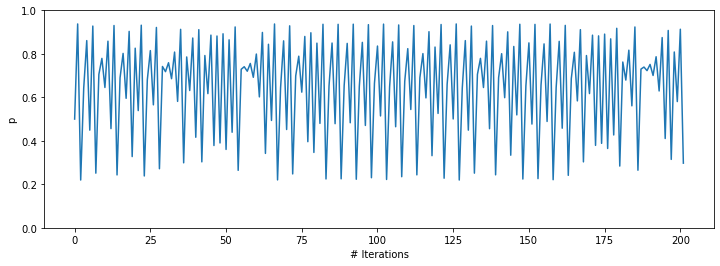

In [78]:
plt.figure(figsize=(12,4))
plt.plot(result_array)
plt.ylabel("p")
plt.xlabel("# Iterations")
plt.ylim(0,1)
